<a href="https://colab.research.google.com/github/paulorayner/repositorio_dsnp/blob/master/Dados_Airbnb_Nova_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando dados do Airbnb - Cidade de Nova York, Estados Unidos.
O [Airbnb](https://www.airbnb.com.br/) é uma startup fundada em 2008 como uma plataforma de locação de quartos e imóveis a um valor mais baixo do que o praticado pela rede hoteleria. O intúito era permitir que o viajante conseguisse se hospedar reduzindo os custos. Em contra partida, o dono do imóvel conseguiria uma renda extra. O modelo de negócio funcionou de tal maneira que hoje já é considerado como sendo a **a maior empresa de hospeagem da atualidade**. Um detalhe importante é que o Airbnb **não possui nenhum hotel**! Além do serviço de hospedagem, já é possível que os hóspedes façam reservas de passeios, aventuras e experiências gastronômicas. 

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, serão analisados os dados referentes à cidade de Nova York.**

#Q1. Qual o objetivo desta análise?

Este notebook tem por o objetivo análisar e mapear as regiões com melhores avaliações da localidade da cidade de Nova York.

#Obtenção dos dados
Os dados utilizados na execução desta análise foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Esta é uma base de dados públicos disponibilizados pelo próprio Airbnb.
Dentro dessa base de dados, existem diferentes `dataset`. Para esta análise vamos utilizar o arquivo mais completo e, consequentemente, com maior volume de dados denominado `listings.csv.gz` (na coluna File name). 

In [0]:
# Importação dos pacotes que serão utilizados nesta análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
#Importação dos dados listings.cvs.gz para o DataFrame
    df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2019-09-12/data/listings.csv.gz",low_memory= False)


##Q2. O arquivo foi importado corretamente? 
A função abaixo nos mostras como se o DataFrame (tabela de dados) aqui denominado como ***df*** foi importado corretamente. Podemos conferir a estrutura da tabela e suas respectivas colunas.


In [0]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,https://www.airbnb.com/rooms/3647,20190912153101,2019-09-13,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,NaN,NaN,NaN,Upon arrival please have a legibile copy of yo...,NaN,NaN,https://a0.muscache.com/im/pictures/838341/9b3...,NaN,4632,https://www.airbnb.com/users/show/4632,Elisabeth,2008-11-25,"New York, New York, United States",Make Up Artist National/ (Website hidden by Ai...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/4632/profile_...,https://a0.muscache.com/im/users/4632/profile_...,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"New York, NY, United States",Harlem,Harlem,...,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,https://www.airbnb.com/rooms/3831,20190912153101,2019-09-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,"We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,92%,NaN,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,...,$0.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,1,3,8,192,2019-09-13,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,https://www.airbnb.com/rooms/5022,20190912153101,2019-09-13,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,NaN,NaN,NaN,NaN,Please be considerate when staying in the apar...,NaN,NaN,https://a0.muscache.com/im/pictures/feb453bd-f...,NaN,7192,https://www.airbnb.com/users/show/7192,Laura,2009-01-29,"Miami, Florida, United States",I have been a NYer for almost 10 years. I came...,NaN,NaN,NaN,f,https:/

#Q3. Qual a dimensão do df?
Antes de começar a trabalhar o conjunto de dados, é extremamente importante verificar a dimensão do DataFrame, para isso vamos verificar quantas linhas (variáveis) e quantas colunas (entradas) o **df** apresenta.

In [0]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

Entradas:	 48377
Variáveis:	 106



# Estrutura do **df**

Como é possível observar, este **DataFrame** apresenta 106 variáveis, ou seja, **106 colunas**. Entretanto, tendo em vista o objetivo desta análise, algumas entradas não serão utilizadas. Dessa forma, serão excuídas as entradas que não apresentam relevância ao objetivo desta análise.

## Analisandos as variáveis presentes no DataFrame

In [0]:
#retorna todas colunas do DataFrame
df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

# **Por medida de segurança, todas a modificações serão realizadas em uma cópia do df original**

In [0]:
# Aqui denominada de "newdf".
newdf = df.copy()

#Q4. Quais colunas serão exlcuídas? e porquê?
Tendo em vista o objetivo desta análise, algumas colunas não trazem informações relevantes ao propósito. Dessa forma, essas entradas serão removidas. Serão mantidas entradas que tragam informações relacionadas ao comportamento do anfitrião, característica do imóvel e da vizinhança, preço e todos os parâmetros relacionados à avaliação ou `reviews` os quais são avaliados pelos hóspedes.

In [0]:
# Excluindo colunas pouco relevantes para as análises.
newdf.drop(['host_id','id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_thumbnail_url', 'host_picture_url',
       'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm','is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture','require_guest_phone_verification',
       'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
       'reviews_per_month', 'host_acceptance_rate','jurisdiction_names',
       'license','square_feet', 'monthly_price', 'weekly_price', 'country_code', 'country',
       'host_verifications', 'market', 'state', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'calendar_last_scraped','neighbourhood_cleansed',
       'smart_location', 'amenities', 'calendar_updated', 'requires_license', 'host_about'], axis=1, inplace=True)

##Após a limpeza do DataFrame, é importante analisar se as entradas que permaneceram estão de fato em consonância com o nosso objetivo. 

In [0]:
#Checando as colunas remanscentes
newdf.columns.values

array(['host_url', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_group_cleansed', 'city', 'zipcode', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'price', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'], dtype=object)

# Dicionário de variáveis 
* host_url - url(link) do anfitrião
* host_name - Nome do anfitrião
* host_since - Mostra a partir de qual data Anfitrião iniciou na plataforma 
* host_location - Localização do anfitrião
* host_response_time - Tempo que o anfitrião leva para responder aos interessados
* host_response_rate - Taxa de resposta do anfitrião
* host_is_superhost - Se este anfitrião é classificado como super anfitrião
* host_neighbourhood - Bairro do anfitrião
* host_total_listings_count - número total de imóveis que este anfitrião possisui
* host_has_profile_pic - Se o anfitrião possui foto no perfil
* host_identity_verified - Se a identidade do anfitrião foi verificada
* street - Rua
* neighbourhood - Bairro
* neighbourhood_group_cleansed -  Grande região a qual pertence o bairro
* city - Cidade
* zipcode - CEP
* latitude - Coordenada geográfica latitude 
* longitude - Coordenada geográfica longitude
* is_location_exact - Se a localização é exata
* property_type - Tipo da propriedade (Casa, apartamento, cabana)
* room_type - Tipo do quarto (coletivo ou individual)
* accommodates - Acomodação
* bathrooms - Número de banheiros
* bedrooms - Número de quartos
* beds - Número de camas
* bed_type - Tipo da cama
* price - Preço da diária
* minimum_nights - Máximo de noites/diárias
* maximum_nights - Mínimo de noites/diárias
* number_of_reviews - Número de avaliações
* number_of_reviews_ltm 
* first_review - Data da primeira avaliação 
* last_review - Data da última avaliação
* review_scores_rating - Taxa de avaliação
* review_scores_accuracy - Avaliação da acurácia 
* review_scores_cleanliness - Avaliação da limpeza do local
* review_scores_checkin - Avaliação do Checkin
* review_scores_communication - Avaliação da comunicação entre hóspede e anfitrião
* review_scores_location - Avaliação da localização
* review_scores_value - Avaliação do valor da diárias
* instant_bookable - Se o aluguel acontece automáticamente sem a aprovação do anfitrião.

## Q5. Qual a porcentagem de valores ausentes no dataset?

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [0]:
# Determinando porcentagem de valores nulos
((newdf.isnull().sum() / newdf.shape[0])*100).sort_values(ascending=False)

host_response_rate              33.933481
host_response_time              33.933481
review_scores_location          21.950514
review_scores_value             21.948447
review_scores_checkin           21.942245
review_scores_accuracy          21.907105
review_scores_communication     21.900903
review_scores_cleanliness       21.876098
review_scores_rating            21.830622
last_review                     19.949563
first_review                    19.949563
host_neighbourhood              12.882155
zipcode                          0.973603
host_location                    0.361742
city                             0.140563
bathrooms                        0.099221
bedrooms                         0.084751
beds                             0.074416
host_name                        0.045476
host_is_superhost                0.043409
host_listings_count              0.043409
host_since                       0.043409
host_total_listings_count        0.043409
host_has_profile_pic             0

In [0]:
#Visualisando as colunas remanescentes.
newdf.head()

,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_group_cleansed,city,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,https://www.airbnb.com/users/show/4632,Elisabeth,2008-11-25,"New York, New York, United States",a few days or more,0%,f,Harlem,1.0,1.0,t,t,"New York, NY, United States",Harlem,Manhattan,New York,10027,40.80902,-73.94190,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,$150.00,3,7,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
1,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",within an hour,92%,f,Clinton Hill,1.0,1.0,t,t,"Brooklyn, NY, United States",Brooklyn,Brooklyn,Brooklyn,11238,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,$89.00,1,730,192,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f
2,https://www.airbnb.com/users/show/7192,Laura,2009-01-29,"Miami, Florida, United States",NaN,NaN,f,East Harlem,1.0,1.0,t,t,"New York, NY, United States",East Harlem,Manhattan,New York,10029,40.79851,-73.94399,t,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,$80.00,10,120,0,9,2,2012-03-20,2018-11-19,93.0,10.0,9.0,10.0,10.0,9.0,10.0,f
3,https://www.airbnb.com/users/show/7322,Chris,2009-02-02,"New York, New York, United States",within a day,78%,f,Flatiron District,1.0,1.0,t,f,"New York, NY, United States",Midtown East,Manhattan,New York,10016,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$200.00,3,21,13,75,10,2009-04-20,2019-07-21,89.0,10.0,9.0,10.0,10.0,9.0,9.0,f
4,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States",a few days or more,0%,f,Bedford-Stuyvesant,1.0,1.0,t,f,"Brooklyn, NY, United States",Bedford-Stuyvesant,Brooklyn,Brooklyn,11216,40.68688,-73.95596,f,Apartment,Private room,2,NaN,1.0,1.0,Futon,$60.00,45,730,0,49,0,2009-05-28,2017-10-05,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f


# Após a exclusão de algumas variáveus, a quantida de colunas reduziram consideravelmente.

In [0]:
print("Entradas:\t {}".format(newdf.shape[0]))
print("Variáveis:\t {}\n".format(newdf.shape[1]))

Entradas:	 48377
Variáveis:	 43



#Q6. Quais as classes do DataFrame?
Antes de iniciar a análise dos dados, é importante ter conhecimento da forma como os dados (entradas) de cada variáveel estão classificadas. Pois é comum dados serem classificados de maneira equivocada devido a presença de caracteres especiais, por exemplo, números com símbolos de moedas ($, €, £)  esterem sendo reconhecidos como texto. Assim, vamos varificar a classificação dos dados de cada variável utilizando a função `display()`.

In [0]:
# verificar as entradas do DataFrame
display(newdf.dtypes)

host_url                         object
host_name                        object
host_since                       object
host_location                    object
host_response_time               object
host_response_rate               object
host_is_superhost                object
host_neighbourhood               object
host_listings_count             float64
host_total_listings_count       float64
host_has_profile_pic             object
host_identity_verified           object
street                           object
neighbourhood                    object
neighbourhood_group_cleansed     object
city                             object
zipcode                          object
latitude                        float64
longitude                       float64
is_location_exact                object
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64


## Ao explorar a tabela de dados, foi possível observar que a coluna "price" (preços) está com o símbolo $. Isso faz com que a coluna seja reconhecida como um objeto (`object`) ao invés de ser reconhecida como números (`float` ou `int`). Impossibilitanto, por exemplo, a aplicação de cálculos matemáticos, produção de gráficos, etc. Dessa forma, serão realizados os seguintes passos: 

* Romover o símbolo referente à moeda. Para isso será utilizada a a função `strip`.

* Retirar as vírgulas, pois na língua inglesa o separador de milhares é a vírgula, e isso gera erro. Para isso será utilizada a função `replace`. 
  
* Fazer a conversão da classe objeto (`object`) para números com casa decimais (`float`), utilizando a função `astype()`.

# Para fazer os ajustes necessários, exetuve a função abaixo.

In [0]:
#Removendo o símbolo de '$' e ','
newdf.price = ([x.strip('$') for x in newdf.price])
newdf.price = ([x.replace(',', '') for x in newdf.price])

In [0]:
# Convertendo "object" para "float"
newdf['price'] = newdf['price'].astype(np.float)

In [0]:
# Checar se a conversão ocorreu com sucesso. O resultado da função abaixo deve ser "float"
print(newdf.price.dtypes)

float64


# Após os ajustes na classificação dos dados, o próximo passo é analisar se existem outliers. 

Para isso será construído um gráfico do tipo boxplot. Ele nos retorna como os dados estão distribuídos e se existem outliers (ou valores discrepantes que não seguem o mesmo padrão da população de um conjunto de dados).

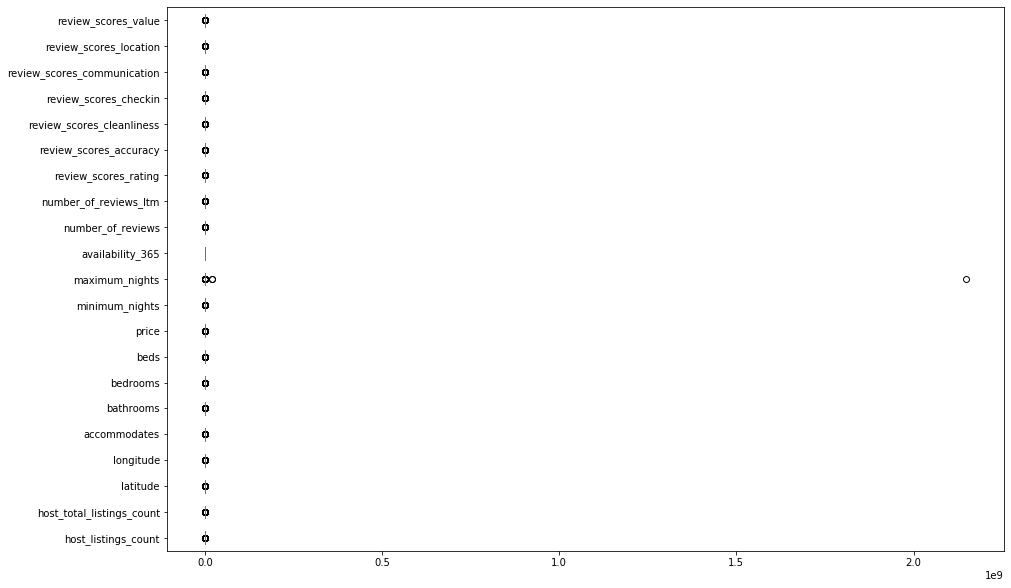

In [0]:
#Construíndo o boxplot
newdf.plot(kind='box', vert=False, figsize=(15, 10))
plt.show()

# A variável maximum_nights apresenta uma variação muito grande entre os valores.
Para verificar a amplitude dos valores para ter uma melhor visualização de como estes dados estão variando. Vamos organizar os valores em ordem descrescente e listá-los no topo da lista.

In [0]:
#Chequando os valores máximos da entrada maximum_nights organizados em ordem decrescente.
print((newdf["maximum_nights"]).sort_values(ascending=False))

7888     2147483647
7818       20000000
9569       20000000
6109        1000000
5085          99999
            ...    
21064             1
39135             1
43625             1
40116             1
14917             1
Name: maximum_nights, Length: 48377, dtype: int64


###Note que ao ordenar as os valores por ordem decrescente, o 5 primeiros valores da lista já se mostram suspeitos. E nos permite entender o motivo da amplitude dessa variação. Um anfitrião permite que você alugue o imóvel por mais de 2 bilhões de diárias,algo em torno de 5 milhões e oitocentos mil anos. O segundo e o terceiro, permitem que você alugue por 20 milhões de diárias, mais ou menos 54 mil anos. Ou seja, são valores tecnicamente impraticáveis. Isso mostra a importância de explorar a qualidade do dataset que será utilizado na análise. Assim, para deixar o dataset com valores mais próximos à realidade, vamos restringir como número máximo de noites de 730 (ou 2 anos).
Para isso será utilizada a função `drop()`.

In [0]:
#Essa função restringe o número máximo de noites a valores menores ou iguais a 730.
newdf.drop(newdf[newdf.maximum_nights >= 730].index, axis=0, inplace=True)
print(newdf['maximum_nights'].sort_values(ascending=False))

35924    720
697      720
18713    720
29530    720
2106     720
        ... 
16849      1
23175      1
46857      1
41013      1
36691      1
Name: maximum_nights, Length: 23884, dtype: int64


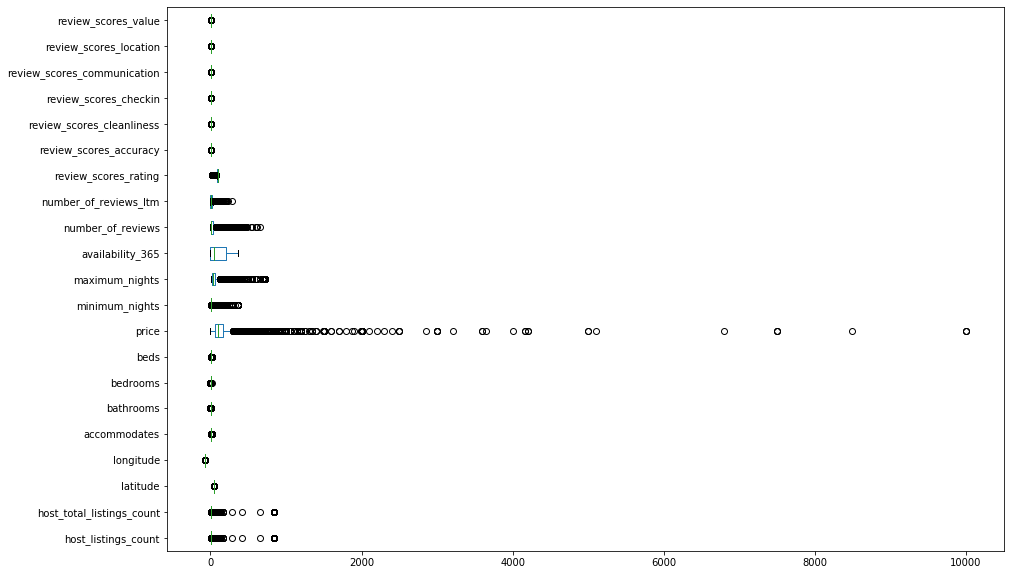

In [0]:
# Checando o resultado
newdf.plot(kind='box', vert=False, figsize=(15, 10))
plt.show()

## Os valores do número máximo de noites apresentam uma amplitude de variação menor. Entretanto, agora a coluna referente aos preços das diárias 'price' também apresenta uma variação estranha. 

## Dessa forma, seguindo a mesma lógica do numéro máximo de noites, vamos verificar os valores da coluna dos preços.

In [0]:
#Checar os valores máximos da entrada preços
print((newdf['price']).sort_values(ascending=False))

27780    10000.0
16951    10000.0
11823     9999.0
28725     8500.0
42356     7500.0
          ...   
29481       10.0
43506       10.0
32588       10.0
24982        0.0
24499        0.0
Name: price, Length: 23884, dtype: float64


## Note que que existem alugueis de 10 mil dólares a diária, um preço acima de vários hotéis de luxo da cidade de Nova York. Além disso, existem também quartos com valores zerados. Dessa forma, serão filtrados valores abaixo de 300 dólares e acima de 0.00



In [0]:
#Selecionando valores menores que 300 dólares a diária e maiores que 0.0
newdf.drop(newdf[newdf.price > 300].index, axis=0, inplace=True)
newdf.drop(newdf[newdf.price == 0.0].index, axis=0, inplace=True)

print(newdf['price'].sort_values(ascending=False))

38796    300.0
6867     300.0
17663    300.0
17565    300.0
17459    300.0
         ...  
33660     10.0
32588     10.0
31738     10.0
29481     10.0
31469     10.0
Name: price, Length: 22514, dtype: float64


#Q6. Como está a distribuição dos dados?

Após realizada a filtragem dos dados, vamos analisar a distrubuição. Para isso será construído um gráfico do tipo histograma, tabela  estatística e um gráfico do tipo boxplot. 

##Histograma

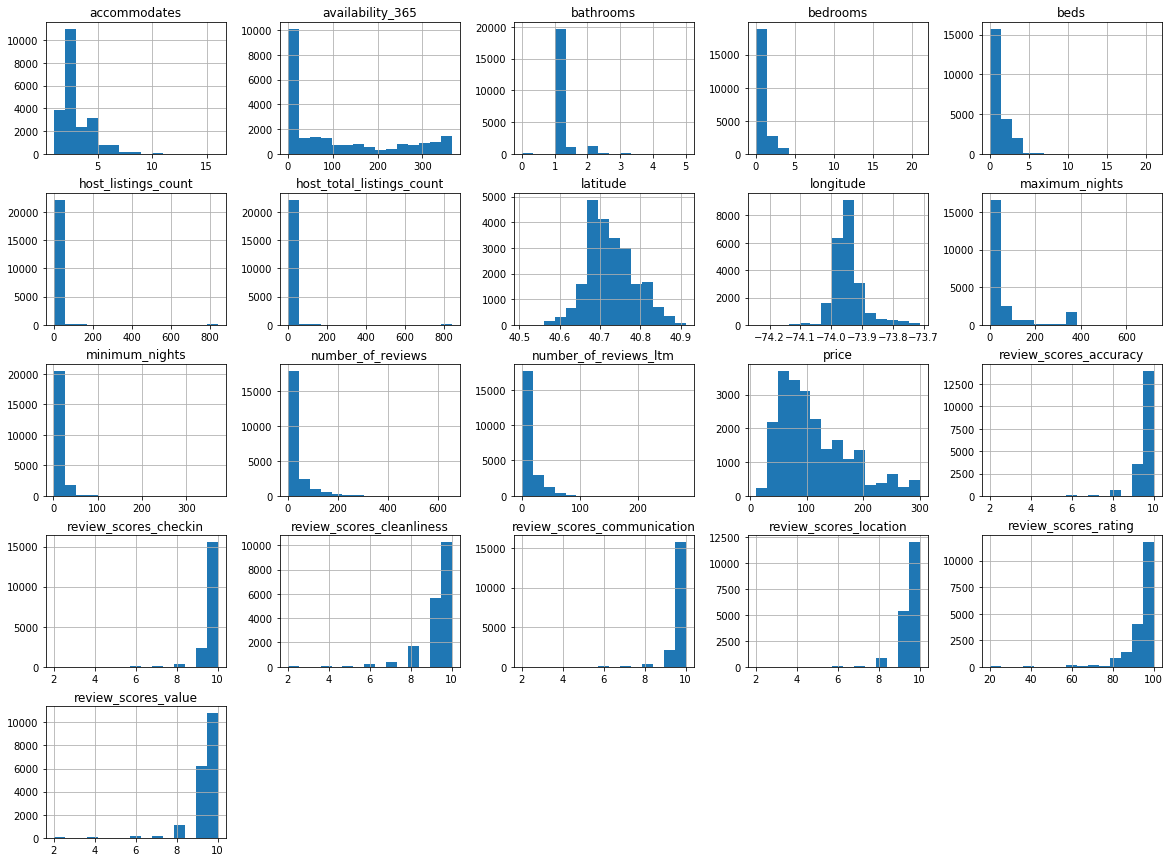

In [0]:
# plotar o histograma das variáveis numéricas
newdf.hist(bins=15, figsize=(20,15));

##Tabela Estatística

In [0]:
# Construir a tablea estatística
newdf[['price', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'review_scores_accuracy',
    'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_rating',
    'review_scores_value']].describe()

,price,maximum_nights,minimum_nights,number_of_reviews,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_location,review_scores_rating,review_scores_value
count,22514.000000,22514.000000,22514.000000,22514.000000,18526.000000,18518.000000,18531.000000,18516.000000,18536.000000,18515.000000
mean,114.052945,63.868748,6.833881,28.889580,9.664472,9.782482,9.326318,9.564377,94.357467,9.458277
std,63.746592,102.113387,16.637837,51.113606,0.757592,0.646267,1.014885,0.727911,7.804598,0.837264
min,10.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,20.000000,2.000000
25%,65.000000,14.000000,2.000000,1.000000,10.000000,10.000000,9.000000,9.000000,92.000000,9.000000
50%,99.000000,28.000000,3.000000,8.000000,10.000000,10.000000,10.000000,10.000000,97.000000,10.000000
75%,150.000000,60.000000,5.000000,32.000000,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000
max,300.000000,720.000000,370.000000,654.000000,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000


##Boxplot

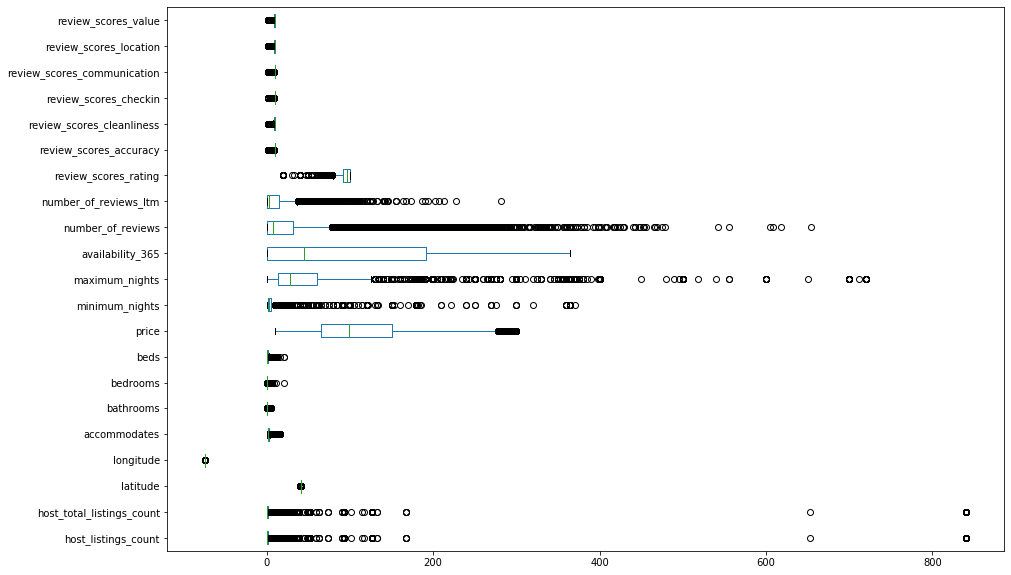

In [0]:
#Contruir boxplot
newdf.plot(kind='box', vert=False, figsize=(15, 10))
plt.show()

#**Após a realização dos ajustes, o próximo passo é realizar a análise dos dados.**

#Q4. Quais as vizinhanças com melhores avaliações no quesito localização?
Para isso será construído uma tabela contendo o bairro ("neighbourhood") a região ao qual este bairro está inserido ('neighbourhood_group_cleansed') e as avaliações da localização ('review_scores_location'). A cidade de Nova York possui 5 regiões são elas **Bronx, Brooklyn, Staten Island, Queens e Manhatan**

In [0]:
# Agrupando valores pelo bairro, região e média das avaliações da localização
my_new_df = newdf.groupby(["neighbourhood", ('neighbourhood_group_cleansed')]).review_scores_location.mean().sort_values(ascending=False)
novo_df = pd.DataFrame(my_new_df,)

## A tabela abaixo traz o resultado da função executada acima.
A coluna "neighbourhood" traz o nome do bairo, a coluna "neighbourhood_group_cleansed" mostra em qual região este bairro está inserido e os valores são as médias da avaliação da localização organizadas de forma descrescente. 
Esta análise permite ao viajante ter uma visão dos imóveis com boa localização, segundo os hóspedes que já frequentaram as instalações. 

In [0]:
#As 40 vizinhanças mais bem avaliadas no quesito qualificação
print(my_new_df.head(40))

neighbourhood                  neighbourhood_group_cleansed
City Island                    Bronx                           10.000000
Rosebank                       Staten Island                   10.000000
Brooklyn                       Queens                          10.000000
Hudson Square                  Manhattan                       10.000000
Castleton Corners              Staten Island                   10.000000
South Street Seaport           Manhattan                       10.000000
Civic Center                   Manhattan                       10.000000
Silver Lake                    Staten Island                   10.000000
Sea Gate                       Brooklyn                        10.000000
DUMBO                          Brooklyn                        10.000000
Tompkinsville                  Staten Island                   10.000000
Greenwich Village              Manhattan                       10.000000
Great Kills                    Staten Island                   1

##O gráfico abaixo traz todas as regiões ranqueadas de acordo com a avaliação da localização. 

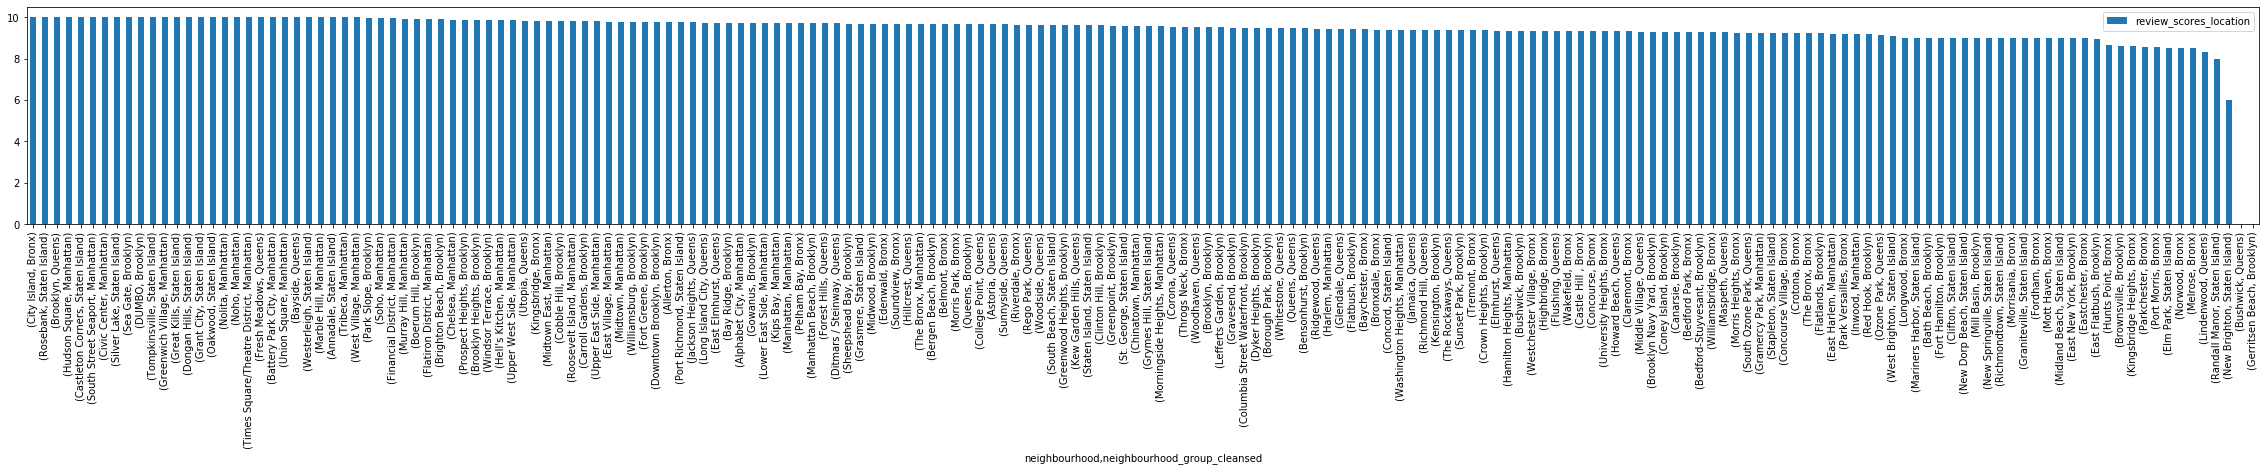

In [0]:
novo_df.plot(kind= 'bar', figsize=(40,4));

## Com essa primeira análise, é possível observar quais bairros e a qual região eles pertencem que apresentam as melhores avaliações tendo como base o parâmetro localização. 

#**Q4. Qual a correlação entre as variáveis?**
É natural pensarmos que locais com melhores localizações também possuem preços mais altos. Para verificar se essa premissa se aplica, vamos realizar a análise de correlação. 

  A análise correlação retorna o grau de relacionamento entre dois pontos. Em geral, admite-se que as variáveis estão fortemente relacionadas quando o grau de relacionamento apresenta um valor acima de **0.7**. Mas atenção, este valor depende das características dos dados. Assim, é importante saber avaliar o dataset. Para o nosso conjunto de dados, vamos considerar o valor de **0.7**. Em nosso contexto, estamos buscando relação entre duas variáveis.

Essa relação pode ser medida, em função do coeficiente de correlação para  estabelecer qual a intensidade do grau de relacionamento. Para identificar as correlações existentes entre as variáveis de interesse,serão realizados os seguintes passos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [0]:
# criar uma matriz de correlação
corr = newdf[['accommodates', 'availability_365', 'bathrooms', 'bedrooms', 'beds',
              'host_listings_count', 'host_total_listings_count', 'maximum_nights', 'minimum_nights',
              'number_of_reviews', 'price', 'review_scores_accuracy', 'review_scores_checkin',
              'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location',
              'review_scores_rating', 'review_scores_value']].corr()

display(corr)

,accommodates,availability_365,bathrooms,bedrooms,beds,host_listings_count,host_total_listings_count,maximum_nights,minimum_nights,number_of_reviews,price,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value
accommodates,1.000000,0.136489,0.191399,0.560041,0.720231,-0.029900,-0.029900,0.059288,-0.023049,0.108581,0.470031,-0.012474,0.009377,0.025227,-0.015244,-0.054356,-0.026353,-0.036005
availability_365,0.136489,1.000000,0.031700,0.064318,0.131594,0.103449,0.103449,0.317680,0.121762,0.214467,0.054708,-0.082289,-0.040254,0.008743,-0.069247,-0.074427,-0.080222,-0.104950
bathrooms,0.191399,0.031700,1.000000,0.274506,0.213025,-0.017146,-0.017146,0.049361,0.003684,-0.003701,0.063808,-0.014844,-0.016715,-0.024462,-0.019487,-0.035651,-0.015712,-0.002108
bedrooms,0.560041,0.064318,0.274506,1.000000,0.575564,-0.059638,-0.059638,0.025525,-0.001115,0.039533,0.249492,-0.000634,0.015126,0.018066,-0.003145,-0.056866,-0.001655,0.005355
beds,0.720231,0.131594,0.213025,0.575564,1.000000,-0.036325,-0.036325,0.055690,-0.005215,0.077271,0.331733,-0.027805,0.001771,0.006041,-0.022545,-0.056120,-0.038135,-0.034648
host_listings_count,-0.029900,0.103449,-0.017146,-0.059638,-0.036325,1.000000,1.000000,0.051668,0.133502,-0.049981,0.163392,-0.030764,-0.035114,-0.017406,-0.051068,-0.009988,-0.029223,-0.051106
host_total_listings_count,-0.029900,0.103449,-0.017146,-0.059638,-0.036325,1.000000,1.000000,0.051668,0.133502,-0.049981,0.163392,-0.030764,-0.035114,-0.017406,-0.051068,-0.009988,-0.029223,-0.051106
maximum_nights,0.059288,0.317680,0.049361,0.025525,0.055690,0.051668,0.051668,1.000000,0.375242,0.042876,0.034744,-0.074151,-0.046838,-0.056426,-0.059448,-0.028661,-0.062099,-0.110018
minimum_nights,-0.023049,0.121762,0.003684,-0.001115,-0.005215,0.133502,0.133502,0.375242,1.000000,-0.106588,0.032852,-0.028593,-0.032176,-0.048462,-0.026655,0.003324,-0.016214,-0.059177
number_of_reviews,0.108581,0.214467,-0.003701,0.039533,0.077271,-0.049981,-0.049981,0.042876,-0.106588,1.000000,-0.025649,0.077102,0.078687,0.086628,0.065675,0.017881,0.026953,0.045645


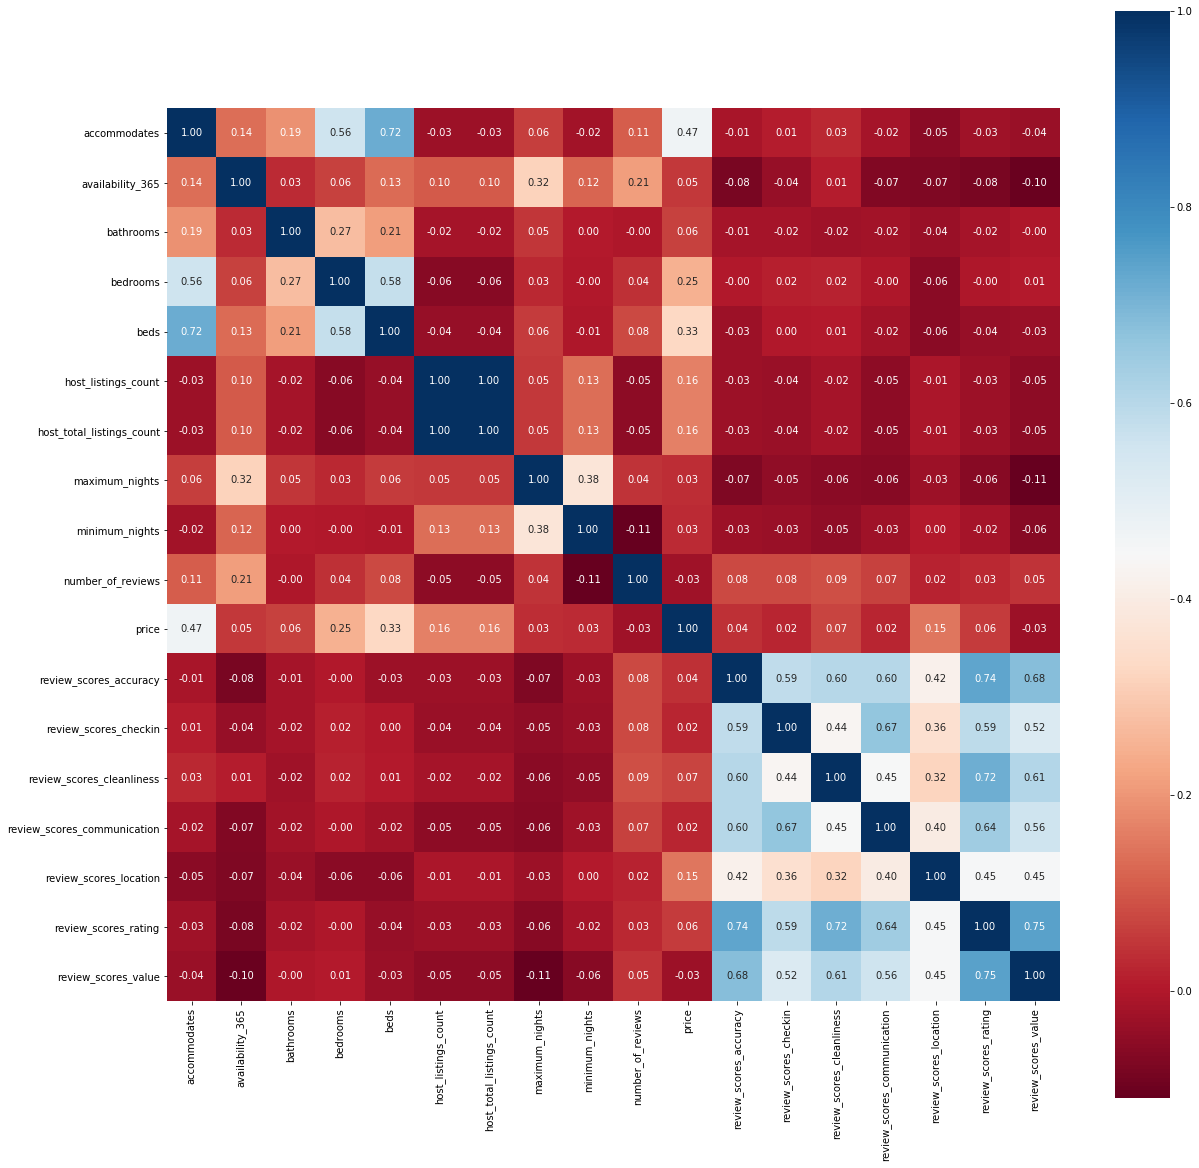

In [0]:
#Criar um heatmap. O Heatmap é a representação gráfica da matriz de correlação.
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

# Resultados da análise de correlção
 Partindo da nossa premissa de que localização e preço estão relacionados. `reviewsl_scores_location`  e `price` respectivamente. É possível perceber que essa correlação baixa. Isso porque existem aluguéis elevados em imóveis com avaliação da localização baixa e imóveis com preço baixo em imóveis com avaliação de localização alta. Mas no geral, melhor localização não está relacionado com maior preço. 

  Curiosamente, analisando parâmetros como a acurácia ou precisão das informações (`review_scores_accuracy`), a facilidade de realizar o checkin (`review_scores_checkin`), a limpeza do imóvel (`review_scores_cleanliness`), a comunicação entre hóspede e anfitrião (`review_scores_communication`), e o valor do aluguel (entenda-se valor como a relação entre a qualidade do serviço e o preço pago `review_scores_value`) e a correlação com a avaliação geral (`review_scores_rating`). É possível percerber que eles possuem um alto grau de relacionamento. Ou seja, quanto maior a avalição geral, maior serão os outros parâmetros. Entretanto, a avalição da localização não apresenta o mesmo grau de relacionamento. Na verdade a correlação entre a avaliação geral e a avaliação da localização apresenta uma correlação menor que os outros parâmetros. Isso significa que o fato de um imóvel ser bem avaliado no geral (`review_scores_rating`), não garante que ele esteja em uma região bem avaliada. E por outro lado, um imóvel mal avaliado não significa que ele esteja em uma região mal avaliada. 

# Para visualisar os dados das melhores avaliações da localização. Vamos contruir um gráfico utilizando as coordenadas geográficas `latitude` e `longitude` e o parâmetro `review_scores_location`.
A barra à direita representa a escala baseada na avaliação dos hóspedes.

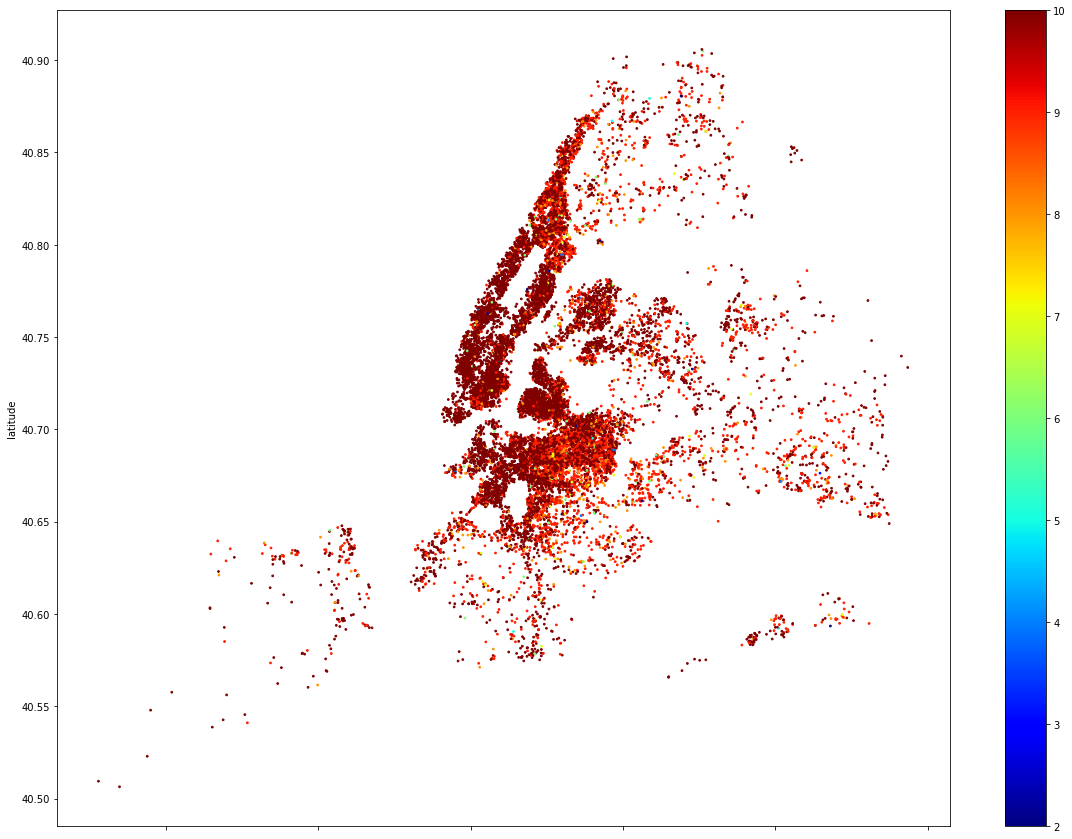

In [0]:
# plotar os imóveis pela latitude-longitude em função da avaliação da localização do imóvel
newdf.plot(kind='scatter', x='longitude', y='latitude', alpha=1.0, c=newdf['review_scores_location'], s=3,
              cmap=plt.get_cmap('jet'), figsize=(20,15));

# Os parâmetros utilizados foram as coordenadas geográficas `latitude` e `longitude` e o preço `price`.
A barra da direita representa os preços dos aluguéis dos quartos.

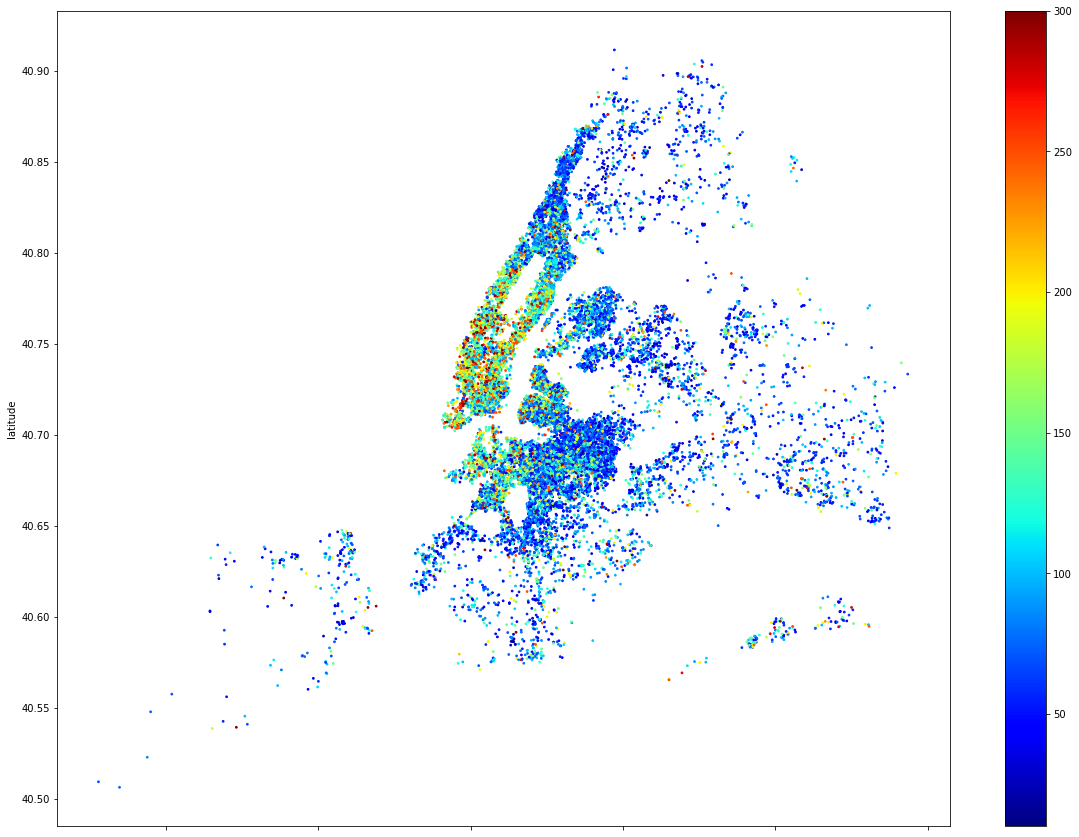

In [0]:
# plotar os imóveis pela latitude-longitude em função do preço aluguel
newdf.plot(kind='scatter', x='longitude', y='latitude', alpha=1.0, c=newdf['price'], s=3,
              cmap=plt.get_cmap('jet'), figsize=(20,15), );

Apesar da análise de correlação não confirmar a relação entre o preço e a localização. É possível perceber que alguns imóveis se encaixam neste perfil, principalmente aqueleas nos arredores do Central Park. Essa região fica entre a latitude 40.80 e 40.75 no quarto quadrante (da esquerda para direita). Estes imóveis apresentam apresentam avaliação uma intesidade de coloração compatível com a avaliação 10 no quesito localização (primeiro gráfico) e uma coloração compatível com aluguéis entre 150 e 300 dólares. Entretanto, existe um grupo de imóveis no mesmo quadrante que também apresentam avalição 10, mas os preços se conecentram, prioritáriamente, entre os 50 e 150 dólares. 

#**Conclusão**
  Após uma exploração inicial dos dados foi possível perceber que a base de dados precisa ser cuidadosamente examinada para identificar valores inconsistentes e classificações imcompatíveis com as variáveis.
  Já as análises dos dados revelou que o fato de um imóvel estar em um bairro com boa avaliação na localização, não significa que o preço do aluguel será mais alto. E por outro lado, o fato um imóvel apresentar boas médias de avaliação não significa que ele seja bem localizado. 
  Assim, essa análise permite o viajante utilize os filtros do Airbnb de maneira mais eficiente reduzindo o risco de surpresas desagradáveis. 

###**Não vai para Nova York?**
Tudo bem, este notebook funciona com qualquer cidade onde os dados estejam disponíveis. Basta clicar com o botão direito sobre o arquivo `listings.csv.gz` do seu destino, copiar o link e colar na parte de obtenção dos dados, apertar o play e boa viagem.